**How Should Companies Adjust their Advertisement Budget to Increase Product Sales?**

In this page, I will illustrate how could a company adjust their advertisement budget to increase their sales of a particular product using an example dataset (see the source below). This data consists of the sales of that product in 200 different markets, along with advertising budgets for TV, radio, and newspaper for the product for each of the markets. **We suppose that the company doesn't know how to increase sales of the product.** Our task is to potentially find association between ads budget and sales. In order to accomplish this, we could develop a model that can be used to predict sales using the three different media budget.

We first download Numpy and Pandas packages to Python. Then, we the import the data.

In [1]:
import numpy as np
import pandas as pd

## We import the data from a csv file
data = pd.read_csv("/Users/100355063/Desktop/Python_data/adsdata.csv")

## We drop the empthy column that comes with the data using the argument. You can manipulate the following to exlude any columns you don't need.
df = pd.DataFrame(data.drop(['Unnamed: 0'], axis = 1))

In [2]:
print(df)

        TV  radio  newspaper  sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3    9.3
3    151.5   41.3       58.5   18.5
4    180.8   10.8       58.4   12.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1    9.7
197  177.0    9.3        6.4   12.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   13.4

[200 rows x 4 columns]


--> You notice that in our data, sales is in thousands of units while TV, radio, and newspaper are in thousands of dollars.

Next, I list the following questions to guide this mini project to complete our task.

**Question #1: Is there a relationship between sales and advertising budget?** 

We could answer this question by fitting a multiple linear regression model using our advertising data. We regress sales (our response variable) onto TV, radio, and newspaper budgets (predictor variables). We install the following tools onto Python to be able to create a model:

In [3]:
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf

model = smf.ols('sales ~ TV + radio + newspaper', data=df)
model = model.fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 26 Dec 2022   Prob (F-statistic):           1.58e-96
Time:                        21:14:17   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

--> According to our table, F-statistic is around **570** which is pretty hig, so this suggests that at least one of our variables is associated with sales. In addition, R-squared of this model ended up being approximately **0.90** and so we suspect that variability in sales **could be explained by this linear model.**

Next, we must define our variables using letters for simplicity of the future analysis. We convert our data frame columns into Numphy arrays:

In [4]:
y = np.array(df['sales'])
x1 = np.array(df['TV'])
x2 = np.array(df['radio'])
x3 = np.array(df['newspaper'])

--> Then we compute mean values for our response value (y), sales. The average value is 14.022 which is 14,022 units for the 200 markets provided in the data.

In [5]:
from numpy import mean

mean(y)

14.0225

**Question #2: How strong is this relationship?**

In order to answer this question, we could look at two simple indicators- RSE (residual standard error) estimates and R^2 statistic. 

We first compute RSE using the following commands. We can say that on average, actual sales in each market deviate from the true regression line by approximately 1,680 units. Considering the average is 14,022 our percentage error is approximately %12 which is not too bad.

In [6]:
model.resid.std()

1.6727572743844112

Next we consider R-squared of this model, which ended up being approximately 0.90. Since this value is close to 1, we can confidently say that **90% of the variability in sales** could be explained by this linear regression model. This is a strong association.

**Question #3: Which media adverting budget are associated with sales of the product?**

In order to answer this question, we need to take a look at the regression table (provided above) and examine p-values and coefficient values attached to each of the predictor variables. Since the p-values for TV and Radio are very small, and for newspaper is high, we can say that **only TV and radio** budgets are associated with the sales for the product. 

We now take a look at the regression table again or just use the model.params function to pull coefficients for each of the predicotrs. The coefficient value for radio budget is 0.19 (rounded) meaning that every 1000 dollars increase in radio budget leads to an increase in sales by approximately 190 units when TV and newspaper budget is fixed. Same thing could be said for TV budget- every 1000 dollars increase in that budget leads to an increase in sales by approximately 46 units adjusted for the other two budgets.

In [7]:
print(model.params)

Intercept    2.938889
TV           0.045765
radio        0.188530
newspaper   -0.001037
dtype: float64


**Question #4: How large is the association between each media budget and sales?**

In order to answer this question, we can take a look at confidence intervals of each of the predictor variables. Below we compute 95% CI for the coefficients in the model. We have (0.043, 0.049) for TV, (0.172, 0.206) for radio, and (−0.013, 0.011) for newspaper. This suggests that, using CI for radio, for each $1000 increase in radio ads budget, the sales will see an average increse between 172 and 206 units (same thing could be done for TV). Since the interval for newspaper includes zero, this variable is not statistically significant in the presence of the other two variables. We could also interpret the CI for intercept as follows- sales will fall somewhere between 2,324 and 3,554 units in the absence of all the three media advertising.

In [8]:
model = smf.ols('y ~ TV + radio + newspaper', data=df)
model = model.fit()

print(model.conf_int(0.05))

                  0         1
Intercept  2.323762  3.554016
TV         0.043014  0.048516
radio      0.171547  0.205513
newspaper -0.012616  0.010541


--> Another consideration when it comes to the association between the predictors and response variable is the idea of correlation between predictors. Since we do not want predictors to be correlated with each other, we simply create a correlation matrix using the following function. According to the table, newspaper and radio are positively correlated though it's a mild correlation. This indicates that markets with high newspaper advertising tend to also have high radio advertising.

In [9]:
corr_matrix = df.corr()
print(corr_matrix)

                 TV     radio  newspaper     sales
TV         1.000000  0.054809   0.056648  0.782224
radio      0.054809  1.000000   0.354104  0.576223
newspaper  0.056648  0.354104   1.000000  0.228299
sales      0.782224  0.576223   0.228299  1.000000


--> Now we are suspicious about potential collinearity between predictors which is situation in which two or more predicto variables are related to one another. To examine for this, we compute variance inflation factor (VIF). The following is used to define and compute VIF. Looking at the table below, we **do not** see anything problematic since all the VIF values are lower than 5. The mild correlation between radio and newspaper doesn't pose collinearity issue in the model.

In [10]:
def calculate_vif(df, features):    
    vif, tolerance = {}, {}
    
    # all the features that you want to examine
    for feature in features:
        # extract all the other features you will regress against
        X = [f for f in features if f != feature]        
        X, y = df[X], df[feature]
        
        # extract r-squared from the fit
        r2 = LinearRegression().fit(X, y).score(X, y)                
        
        # calculate tolerance
        tolerance[feature] = 1 - r2
        
        # calculate VIF
        vif[feature] = 1/(tolerance[feature])
        
    # return VIF DataFrame
    return pd.DataFrame({'VIF': vif, 'Tolerance': tolerance})

In [11]:
calculate_vif(df=df, features=['TV','radio','newspaper'])

,VIF,Tolerance
TV,1.004611,0.995410
radio,1.144952,0.873399
newspaper,1.145187,0.873220


--> Next we can assess the association of each media budget individually on sales and so we would need to perform three separate simple linear regressions. There is a strong evidence that TV and sales and radio and sales are associated. There is evidence of a mild association between newspaper and sales, when the values of TV and radio are ignored.

In [12]:
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf

model1 = smf.ols('sales ~ TV', data=df)
model1 = model1.fit()
model2 = smf.ols('sales ~ radio', data=df)
model2 = model2.fit()
model3 = smf.ols('sales ~ newspaper', data=df)
model3 = model3.fit()

print(model1.summary(), model2.summary(), model3.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Mon, 26 Dec 2022   Prob (F-statistic):           1.47e-42
Time:                        21:14:17   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.0

Now we look at correlations between variables

In [13]:
model2 = smf.ols('y ~ x1', data=df)
model2 = model2.fit()

model2.params

Intercept    7.032594
x1           0.047537
dtype: float64

In [14]:
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Mon, 26 Dec 2022   Prob (F-statistic):           1.47e-42
Time:                        21:14:17   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.0

In [15]:
model2 = smf.ols('y ~ x1', data=df)
model2 = model2.fit()

print(model2.conf_int(0.05))

                  0         1
Intercept  6.129719  7.935468
x1         0.042231  0.052843


We compute the CI for coefficients Bo (intercept) and B1 (for TV budget)

Using the CI for intercept, we can conclude that sales will fall somewhere between 6,130 and 7,935 units in the absence of TV advertising. 

We can also say that for each $1000 increase in TV ads budget, the sales will see an average increse between 42 and 53 units.

In [16]:
model2.resid.std()

3.250458478006291

We use RSE, residual standard error, to measure the fitness of the model. Interpreting RSE is generally difficult since it's always contextual (depending on the units the variables are measured).

Actual sales in each market deviate from the true regression line by approximately 3,260 units, on average.

In [17]:
print(np.corrcoef(x1, y))

[[1.         0.78222442]
 [0.78222442 1.        ]]


From the table above, R^2 = 0.61 which is equal to (r=0.78)^2. The variation explained by the model is the same as the individual correllation between y and x1.

In [18]:
corr_matrix = df.corr()
print(corr_matrix)

                 TV     radio  newspaper     sales
TV         1.000000  0.054809   0.056648  0.782224
radio      0.054809  1.000000   0.354104  0.576223
newspaper  0.056648  0.354104   1.000000  0.228299
sales      0.782224  0.576223   0.228299  1.000000


In [19]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 26 Dec 2022   Prob (F-statistic):           1.58e-96
Time:                        21:14:17   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

In [20]:
model.resid.std()

1.6727572743844112

In [21]:
model2 = smf.ols('y ~ x1 + x2', data=df)
model2 = model2.fit()

print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Mon, 26 Dec 2022   Prob (F-statistic):           4.83e-98
Time:                        21:14:17   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.0

In [22]:
model3 = smf.ols('y ~ x1 + x2 + x1*x2', data=df)
model3 = model3.fit()

print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1963.
Date:                Mon, 26 Dec 2022   Prob (F-statistic):          6.68e-146
Time:                        21:14:17   Log-Likelihood:                -270.14
No. Observations:                 200   AIC:                             548.3
Df Residuals:                     196   BIC:                             561.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7502      0.248     27.233      0.0

Now we have the model with including the interaction effect of radio and TV advertising. The p-value for the interaction term is low so that effect is significant. The overall R squared for this model is 0.96 vs 0.89 on the previous model which means that the variation in sales is explained better with the later model.

The interpreation of this is that every $1000 increase in TV adversiting (x1) is associated with incresase of 19 + 1.1 * radio (x2) advertising many units. Similar interpretation could be made for radio advertising. 

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1963.
Date:                Mon, 26 Dec 2022   Prob (F-statistic):          6.68e-146
Time:                        21:14:19   Log-Likelihood:                -270.14
No. Observations:                 200   AIC:                             548.3
Df Residuals:                     196   BIC:                             561.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7502      0.248     27.233      0.0

eval_env: 1


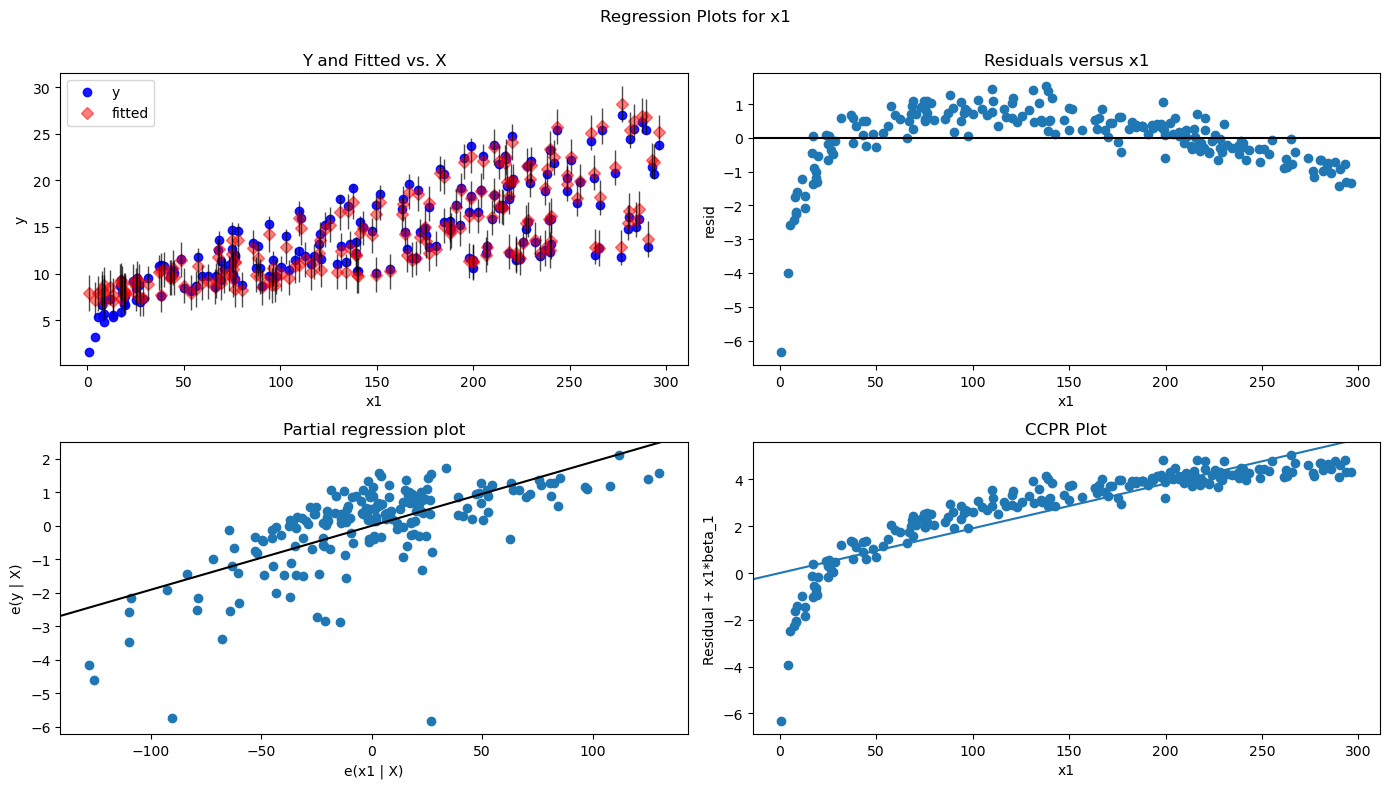

In [24]:
fig = plt.figure(figsize=(14, 8))
fig = sm.graphics.plot_regress_exog(model3, 'x1', fig=fig)

eval_env: 1


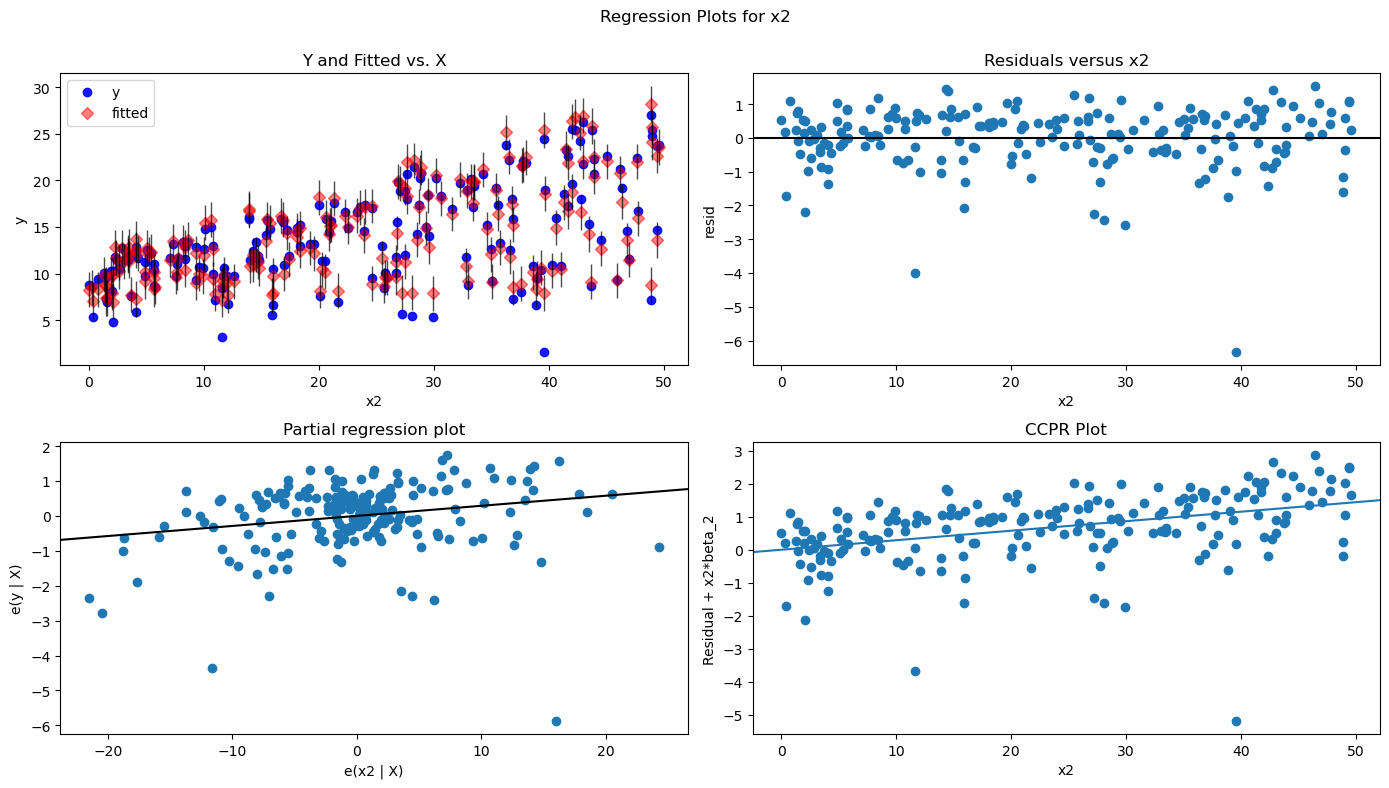

In [25]:
fig = plt.figure(figsize=(14, 8))
fig = sm.graphics.plot_regress_exog(model3, 'x2', fig=fig)

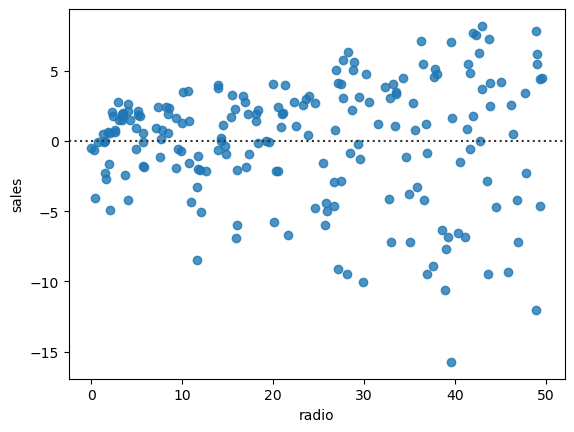

In [26]:
data = pd.read_csv("/Users/100355063/Desktop/Python_data/adsdata.csv")
df = pd.DataFrame(data)
y = np.array(df['sales'])

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.residplot(x= 'radio', y= 'sales', data=data)

plt.show()

Another method is to use seaborn.residplot(). When looking at this, we see sales regressed on radio and plotted the residuals as a scatterplot. There doesn't seem to be a pattern here so I don't think there is an issue with heteroscedasticity.

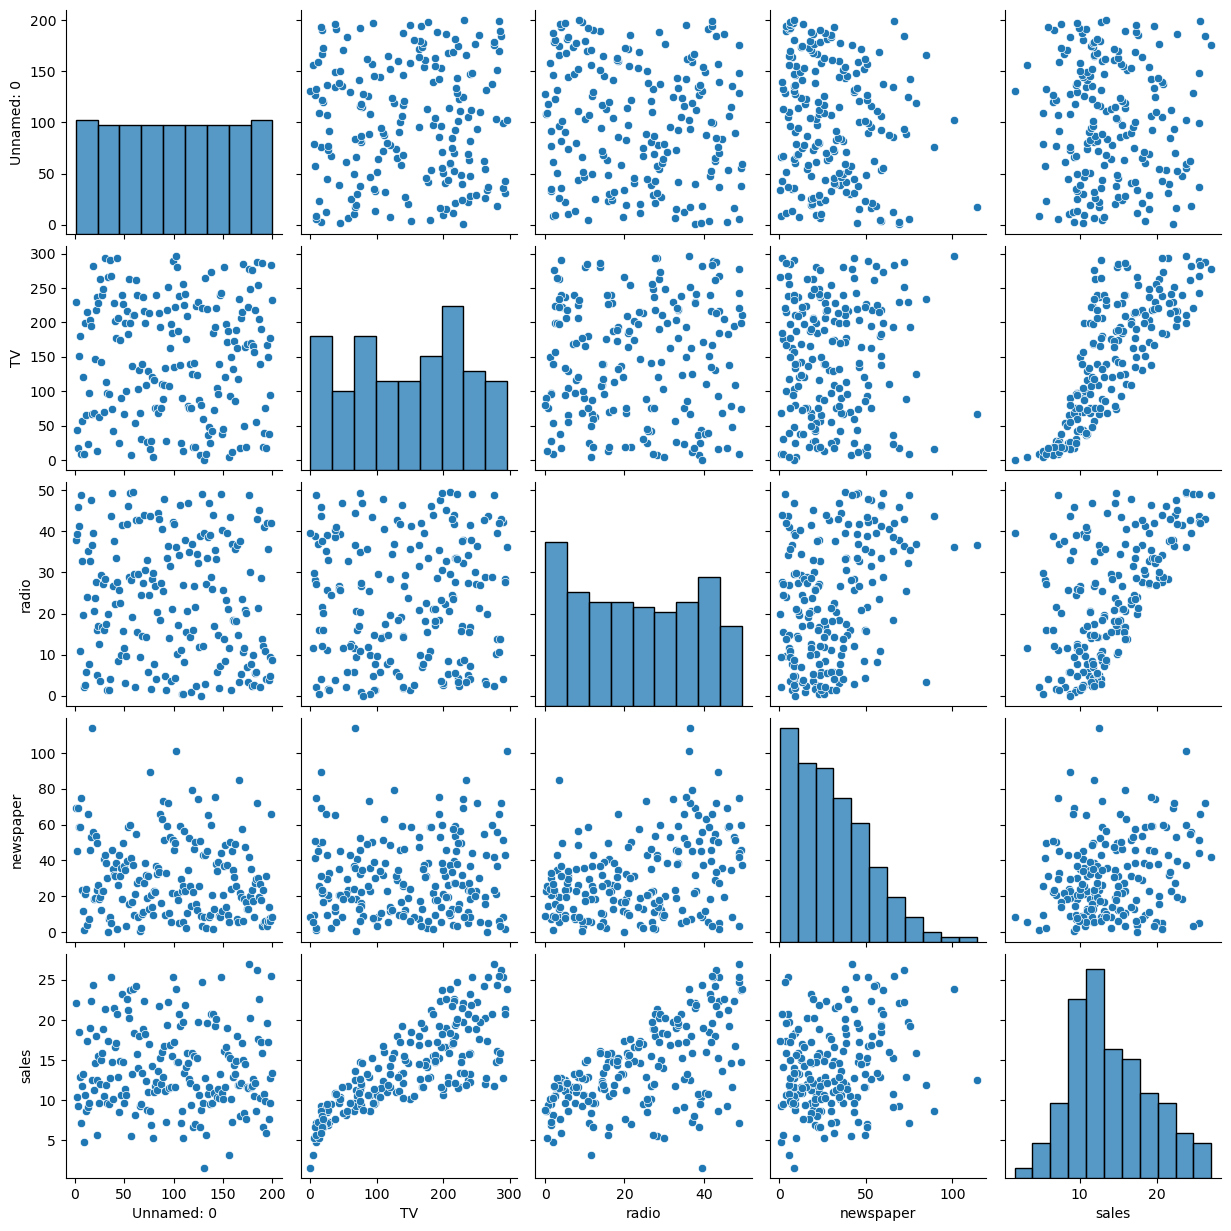

In [27]:
import seaborn as sns
sns.pairplot(df)

In [28]:
df.corr()

,Unnamed: 0,TV,radio,newspaper,sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
radio,-0.110680,0.054809,1.000000,0.354104,0.576223
newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
sales,-0.051616,0.782224,0.576223,0.228299,1.000000
